In [6]:
import torch as t

from typing import Union, Optional
from einops import rearrange, reduce, repeat
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

import matplotlib as mlp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.pyplot import matshow

from training import generate_synthetic_data, train, ProjectAndRecover
from visualization import plot_weights_and_bias, visualize_superposition

In [7]:
input_dim = 20
hidden_dim = 5
sparsity = 0.7 # or any value in [0,1)
importance = t.tensor([.7 ** i for i  in range(input_dim)])
device = 'cpu'

In [8]:
data = generate_synthetic_data(20, 100000, sparsity)

batch_size = 128
trainloader = DataLoader(tuple((data)), batch_size= batch_size)

model = ProjectAndRecover(input_dim, hidden_dim, importance).to(device).train()
model = train(model, trainloader, input_dim, hidden_dim, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0, train loss is 0.045390307903289795
Epoch 1, train loss is 0.010045023635029793
Epoch 2, train loss is 0.0072771161794662476
Epoch 3, train loss is 0.006302633788436651
Epoch 4, train loss is 0.005503204185515642
Epoch 5, train loss is 0.004636950325220823
Epoch 6, train loss is 0.0037587559781968594
Epoch 7, train loss is 0.0029987685848027468
Epoch 8, train loss is 0.0024479138664901257
Epoch 9, train loss is 0.0021332246251404285
Epoch 10, train loss is 0.0018283840036019683
Epoch 11, train loss is 0.0015035715186968446
Epoch 12, train loss is 0.0014334650477394462
Epoch 13, train loss is 0.0014343730872496963
Epoch 14, train loss is 0.0014367661206051707
Epoch 15, train loss is 0.0014376217732205987
Epoch 16, train loss is 0.001438410603441298
Epoch 17, train loss is 0.0014388205017894506
Epoch 18, train loss is 0.0014394953614100814
Epoch 19, train loss is 0.0014397178310900927


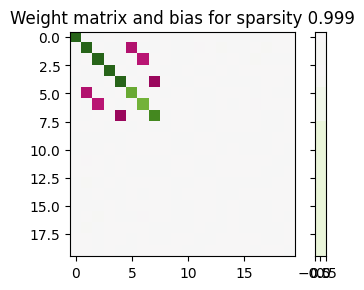

In [9]:
W = model.weights.data
b = model.bias.data
plot_weights_and_bias(W, b)

tensor([1.2739e+00, 1.5347e-01, 1.5569e-01, 1.2727e+00, 2.9711e-02, 9.1404e-02,
        9.4717e-02, 2.2943e-02, 2.3353e-08, 1.9078e-04, 8.8922e-06, 5.0218e-05,
        6.9871e-06, 6.6580e-07, 6.7141e-08, 2.6425e-06, 4.5779e-06, 2.0146e-06,
        1.0626e-05, 2.1603e-06], grad_fn=<ReshapeAliasBackward0>)


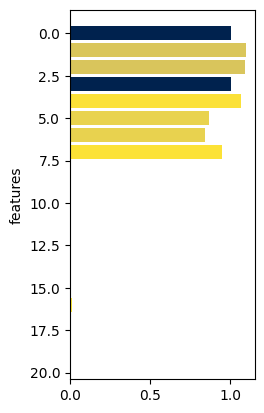

In [10]:
visualize_superposition(model.weights)